**Linear Model Selection and Regularization**

[ISLR Chapter 6](https://link.springer.com/chapter/10.1007/978-1-4614-7138-7_6)

This chapter discusses some ways in which the simple linear model can be improved, by **replacing** plain least squares fitting with some alternative fitting procedures.

Why might we want to use another fitting procedure instead of least squares? Alternative fitting procedures can yield better prediction accuracy and model interpretability.

- Prediction accuracy: If n >> p (number of samples >> number of features), then the least squares estimate coefficients tend to have lower variance. But as the ratio of n:p gets smaller and smaller, the variability goes up to the point where if p >> n, then there can no longer be a *unique* least squares coefficient estimate. The variance is essentially infinite [(see here)](https://stats.stackexchange.com/questions/205987/how-variance-becomes-infinite#:~:text=p%2DNo.,cannot%20be%20used%20at%20all.). Constraining or shrinking the coefficients will reduce the variance at a neglible cost to bias. This can lead to substantial improvements in accuracy.

- Model interpretability: Including *irrelevant* models leads to unnecessary complexity in the model.

**Name three alternatives to using ordinary least squares in a linear model.**
1. Subset selection
2. Shrinkage (regularization)
3. Dimension reduction


CSVs for sample data can be found here: https://github.com/JWarmenhoven/ISLR-python/tree/master/Notebooks/Data

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Code formatting Jupyter black
%load_ext nb_black

<IPython.core.display.Javascript object>

[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

[quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

# Subset selection


# Shrinkage Methods

## Ridge regression

# Dimension Reduction Methods

Above methods have controlled variance either by using a subset of the original variables or by shrinking their coefficients towards zero. All of the methods are defined using the original predictors. Here we look at a class of approaches that *transform* the predictors and then fit a least squares model using the transformed variables.


Let $Z_1, Z_2,...Z_M$ represent M < p linear combinations of our original p predictors. That is,

$𝑍_𝑚 = \sum_{j=1}^p \phi_{jm}X_j $  (6.16)

for some constants $\phi_{1m}, \phi_{2m}..., \phi_{pm} m = 1, ...M.  $

We can then fit the linear regression model

$ y_i = \theta_0 + \sum_{m=1}^M \phi_{m}z_{im} + \epsilon_i,   i = 1, ..., n $  (6.17)

using least squares. This approach where the $\phi$ constants are chosen wisely can possibly show that the dimension reduction approach can often outperform least squares regression. From equation substitutions, (6.16) and (6.17) can be synthesized to produce:

$\beta_j = \sum_{m=1}^{M}\theta_{m}\phi_{jm}$   (6.18)

Equation 6.17 can be thought of a special case of the original linear regression model. This constraint on the form of the coefficients has the potential to bias the coefficient estimates. However, **in situations where p > n (number of features is large compared to number of samples), then selecting a value of M << p can significantly reduce the variance of the fitted coefficients. Andrew Ng's course does not recommend using principal components regression but insteads suggests using regularization in this situation instead.**)** Note that if M = p, and all the $Z_m$ are linearly independent, then 6.18 poses no constraints. In this case, no dimension reduction actually occurs.

The choice of $Z_1, Z_2,...Z_M$ can be achieved in different ways. In this chapter, we will consider two approaches for this task: principal components and partial least squares.

## Principal Components Regression

Principal components analysis (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables. PCA is discussed in greater detail as a tool for unsupervised learning in  Chapter 10. Here we describe its use as a dimension reduction technique for regression.

**An Overview of Principal Components Analysis**

Note that the `Advertising` data in this textbook's section does not reflect the data in the actual .csv file. I will make the following modifications after importing the data:
- create an "ad_spending" column which will assume be the sum of `TV`, `Radio`, and `Newspaper
- subset the data so it shows 100 cities
- synthesize data and create a "Population" column which is roughly correlated with the `ad_spending` column

In [65]:
df_ads = pd.read_csv("ISLR_data/Advertising.csv", index_col=0)
df_ads["Ad_Spending"] = df_ads["Radio"].copy()
df_ads = df_ads.sample(n=100, replace=False)
df_ads["Population"] = round(
    1500 * (df_ads["Ad_Spending"]) + np.random.normal(loc=5000, scale=10000, size=100)
)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Simulated data for PCA example')

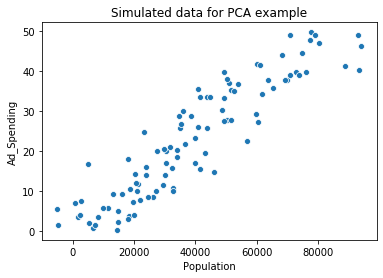

<IPython.core.display.Javascript object>

In [69]:
f, ax1 = plt.subplots()
sns.scatterplot(data=df_ads, x="Population", y="Ad_Spending")
ax1.set_title("Simulated data for PCA example")

PCA is a technique for reducing the dimension of a $n \times p$ data matrix X. The first principal component direction of the data is that along which the observations vary the most. For instance, consider the figure which shows population size (pop) in tens of thousands of people, and ad spending for a particular company (ad) in thousands of dollars, for 100 cities.

In [70]:
# Get principal components
# See also here: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X = df_ads[["Population", "Ad_Spending"]]
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<IPython.core.display.Javascript object>

In [71]:
print(pca.components_)

[[ 9.99999852e-01  5.44577186e-04]
 [-5.44577186e-04  9.99999852e-01]]


<IPython.core.display.Javascript object>

In [72]:
print(pca.explained_variance_)

[5.91399703e+08 3.35423237e+01]


<IPython.core.display.Javascript object>

In [75]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle="->", linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate("", v1, v0, arrowprops=arrowprops)

<IPython.core.display.Javascript object>

(-10105.159856630824, 99106.15985663084, -2.180176600441501, 52.08017660044149)

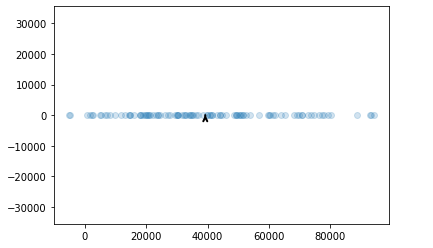

<IPython.core.display.Javascript object>

In [85]:
# plot data

f, ax1 = plt.subplots()
# sns.scatterplot(data=df_ads, x="Population", y="Ad_Spending")
# ax1.set_title("Simulated data for PCA example")

ax1.scatter(np.array(X)[:, 0], np.array(X)[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax1)
plt.axis("equal")

# --